# Multiple linear regression.

Unlike the simple linear regression model, the multiple linear regression model is defined as any linear regression model with at least two explanatory variables. But what do we do when we have several variables? This is what we will see in this chapter. And you will finally be able to measure all the power of linear regression despite its simplicity!


## Variables studied

First of all, we will load our dataset. This is a fake Dataset for the example. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/data_multi.csv')

In [3]:
df

,x_1,x_2,y
0,1.054452,-1.070753,-81.464433
1,-0.362741,-0.634322,-78.752795
2,-0.854096,0.313068,2.218414
3,1.326386,0.298238,52.234160
4,-0.461585,-1.315907,-159.639258
...,...,...,...
95,0.823504,0.771791,86.316340
96,0.976639,0.208275,83.136943
97,-1.347759,1.883151,157.404615
98,0.052165,-1.104383,-136.511136


In [4]:
df.shape

(100, 3)

As you can see we now have 100 rows, 2 features and 1 target.

**Exercise :** Create the `X` and `y` variables and define which column will be the target and which column will be the feature. 
They must be of type `numpy.ndarray`. Our variable `X` has two dimensions this time.

In [5]:
X=df[['x_1' , 'x_2']].to_numpy()
y=df['y'].to_numpy()
X,y

(array([[ 1.05445173, -1.07075262],
        [-0.36274117, -0.63432209],
        [-0.85409574,  0.3130677 ],
        [ 1.3263859 ,  0.29823817],
        [-0.4615846 , -1.31590741],
        [ 1.94362119, -1.17312341],
        [-1.60205766,  0.62523145],
        [-0.40178094,  0.17742614],
        [-0.97727788,  1.86755799],
        [ 0.37816252,  0.15494743],
        [-0.30230275, -0.38732682],
        [-0.74745481, -0.41361898],
        [-0.18718385,  0.04575852],
        [ 0.31872765,  0.92085882],
        [-1.53624369,  0.46566244],
        [ 0.40015721,  1.76405235],
        [-0.82643854, -0.74475482],
        [-0.74216502,  0.8644362 ],
        [ 0.70657317,  0.3563664 ],
        [ 0.90082649, -1.16514984],
        [-0.57884966, -0.87079715],
        [-0.20829876,  0.57659082],
        [ 0.68159452, -1.03424284],
        [ 0.8024564 , -0.26800337],
        [ 0.77749036, -1.25279536],
        [-1.5447711 , -1.00021535],
        [ 0.96939671, -1.270485  ],
        [ 0.67643329, -0.635

### Relationship between variables

To represent a dataset that has two features, we can use 3D visualization.

**Exercise :** Use a 3D matplotlib (or other) graph to view the dataset. 

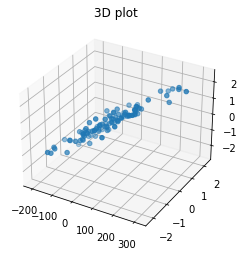

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df["y"], df["x_1"], df["x_2"])
#ax.set_xlabel('x_1')
#ax.set_ylabel('x_2')
#ax.set_zlabel('y')
plt.title('3D plot')
plt.show()
plt.savefig("3D_plot.png", dpi=300, format="png")

If you change the camera angle, you should come across something that looks like this: 
<img src="./assets/3dplot.png" />

This appears to be a positive linear correlation. What do you say?  


If our dataset has more than two dimensions, then we won't be able to display it in 3D. Unfortunately for us, the human being can only perceive 3 dimensions. In this case, we will have no other choice than to display one scatter plot per variable.

And it is there that we realize that the linear regression may be very simple, as soon as we go beyond 3 dimensions, the human being will hardly be able to visualize all the data while the machines are doing very well.

**Exercise :** Create a scatter plot for each variable with respect to the target. You may use  `plt.tight_layout()` after plotting if the graph is too cramped.

**Exercise :** Show correlation coefficients. 

### Split the dataset

You now know the process!

**Exercise :** Import `train_test_split` from `sklearn` and split the dataset and create the variables `X_train`, `X_test`, `y_train`, `y_test`.

##  Load and fit the model (with Sklearn)

How to use `sklearn` now with multiple features ? Well, it's simple, you don't change anything. `sklearn` takes care of everything for you.

1. Import `LinearRegression` from `sklearn`
2. Create a `regressor` variable and instantiate your `LinearRegression` class.
3. Train your model with `X_train` and `y_train`.
4. Display the score of your model with `X_train` and `y_train`.
5. Use the predict method of your model on your test dataset (`X_test`).
6. Display the score of your model with `X_test` and `y_test`.

And voilà !

## From Scratch 
You will see that with matrices, it doesn't change much in the way of proceeding. Matrix writing, moreover, remains the same as simple regression. 

### Transform to matrix

$$
\\ Y = X \cdot \theta \\
$$
The $Y$ vector is the same too
$$ Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
$$

The $X$ matrix will have as many dimensions as there are features +1  (n+1)

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, ..., x^{(m)}_{n}, 1\\
x^{(2)}_1, x^{(2)}_2, ..., x^{(m)}_{n}, 1\\
x^{(3)}_1, x^{(3)}_2, ..., x^{(m)}_{n}, 1\\
x^{(m)}_1,x^{(m)}_2, ..., x^{(m)}_{n}, 1\\
\end{bmatrix}
$$

The theta vector will have as many lines as there are parameters +1 (for the constant). 
$$ \theta =
\begin{bmatrix}
a\\
b\\
c\\
... \\
\end{bmatrix}
$$

For our case with our dataset, we can write it like this: 

$$
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
=
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, 1\\
x^{(2)}_1, x^{(2)}_2, 1\\
x^{(3)}_1, x^{(3)}_2, 1\\
x^{(m)}_1,x^{(m)}_2,  1\\
\end{bmatrix}
\cdot
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
$$

**Exercise :** Create a variable `X` which contains a matrix of shape `(100,3)` with two column's filled with values of our dataframe and then another one with 1's.

**Exercise :** Check that your matrix is of shape `(100,3)`. 

**Exercise :** Create the theta vector with three random values. Your vector must be of shape 
`(3,1)`.

## Create and fit the model
### Define your model

**Exercise :** Create a `model` function that receives as parameter `X` and `theta`. The function must return the computed predictions `y_pred`. This is exactly the same model as last time. 

### Cost function

Well we have the model, the $\theta$ vector, the $X$ matrix. What are we missing? The cost function of course!
And you know what? This too is exactly the same MSE function from last time. 

$$MSE(\theta) = \frac {1}{2m}  \sum (X \cdot \theta - Y)^2$$

**Exercise :** Create a MSE function that receives as parameters `X`, `y` and `theta` using the example above.

### Gradient descent
It's time to find the minimum of our function. Well again, nothing changes compared to the last time. 

$$ \frac {\partial MSE(\theta) }{\partial \theta}  = \frac {1}{m} X^T \cdot (X \cdot \theta - Y)$$

**Exercise :** Create a `grad` function that receives as parameter `X`, `y`, `theta`.

**Exercise :**

1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate`, `n_iterations`.
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the histogram of the model learning process.
3. Create a loop that iterates up to `n_iterations`.
4. In the loop, update `theta` with the formula of the gradient descent (the example above).
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`.
6. return `theta` and `cost_history`.

### Train your model 

**Exercise :** Create variables `n_iterations` and `learning_rate`.

**Exercise:** Create variables `theta_final`, `cost_history` and call `gradient_descent()`.

**Exercise :** 
Create a `predictions` variable that contains `model(X, theta_final)`.



**Exercise :** Plot your predictions in 3D and the true values of the dataset.

**Exercise :** Plot `cost_history`.

### Evaluation

In [282]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [283]:
coef_determination(y, predictions)

y    0.93205
dtype: float64

### Congratulations !

You are now able to create a multiple variable regression model from scratch, well, from the matrix!

<img src="https://media.giphy.com/media/W9lzJDwciz6bS/giphy.gif">